## Forest Cover Type Prediction

## Data Description

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:<br>

1 - Spruce/Fir<br>
2 - Lodgepole Pine<br>
3 - Ponderosa Pine<br>
4 - Cottonwood/Willow<br>
5 - Aspen<br>
6 - Douglas-fir<br>
7 - Krummholz<br>

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).<br>

Data Fields<br>
Elevation - Elevation in meters<br>
Aspect - Aspect in degrees azimuth<br>
Slope - Slope in degrees<br>
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features<br>
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features<br>
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway<br>
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice<br>
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice<br>
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice<br>
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points<br>
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation<br>
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation<br>
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation<br>

The wilderness areas are:<br>

1 - Rawah Wilderness Area<br>
2 - Neota Wilderness Area<br>
3 - Comanche Peak Wilderness Area<br>
4 - Cache la Poudre Wilderness Area<br>

The soil types are:<br>

1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
7 Gothic family.<br>
8 Supervisor - Limber families complex.<br>
9 Troutville family, very stony.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
12 Legault family - Rock land complex, stony.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>
18 Rogert family, very stony.<br>
19 Typic Cryaquolis - Borohemists complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
26 Granile - Catamount families complex, very stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

In [156]:
import numpy as np, pandas as pd

In [157]:
forest_data = pd.read_csv("train.csv")

In [158]:
forest_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [159]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [162]:
forest_data.describe(include="all")

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [163]:
import pandas_profiling 
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = forest_data.profile_report(title='Project Profiling before Data Preprocessing')
profile.to_file(output_file="Project_profiling_before_preprocessing_new.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 56
- Number of observations: 15120
- Missing cells: 0 (0%)

__Variables types__: 
- Numeric = 12
- Bool = 44

__Value Counts__:
Each Cover type count is 2160. All 7 are equal
<br>

- **5 duplicate rows** in the dataset

- **id** is continuos numbers starting from 1 to 15120*
- **Soil_Type7 and Soil_Type15** have constant values as 0 
    *Could be dropped*
- **Horizontal_distance_to_hydrology and Vertical_distance_to_hydrology** have zero values. 
    *They need not be outliers. It could mean that the water-specific is present in the same axis the area under observation
- **Horizontal_distance_to_firepoints** and **Horizontal_distance_to_roadways** have skewed distribution and few high values.
    *It need not mean that they are outliers. Few forest areas could actually be very far from firepoints and roadways

## Correlation of other variables with the target variable

!["Correlation"](correlation.png "Title")

#### No missing values
#### Categorical variables already encoded
#### No outliers as explained above
#### No imbalance in data as all 7 types of forest cover have equal count

#### Drop columns id(not needed for the model), soil_type7 and soil_type15 (constant values)

In [164]:
forest_data.drop(['Id','Soil_Type7','Soil_Type15'], axis=1, inplace=True)

In [165]:
forest_data.shape

(15120, 53)

In [166]:
X = forest_data.drop(["Cover_Type"], axis=1)
y = forest_data.Cover_Type

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, train_size = 0.75, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11340, 52)
(3780, 52)
(11340,)
(3780,)


In [168]:
y_test.value_counts()

7    540
5    540
3    540
1    540
6    540
4    540
2    540
Name: Cover_Type, dtype: int64

In [169]:
#Lets perform scaling on the dataset

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [170]:
X_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [171]:
X_train_df=pd.DataFrame(X_train_scaled, columns=X_train.columns) 

In [172]:
X_test_df=pd.DataFrame(X_test_scaled, columns=X_test.columns) 

In [173]:
print(X_train_df.shape)
print(X_test_df.shape)
print(y_train.shape)
print(y_test.shape)

(11340, 52)
(3780, 52)
(11340,)
(3780,)


Lets create a base algorithm of Logistic Regression

In [174]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 1,  max_iter=1000)
lr.fit(X_train_df, y_train)
y_pred_lr = lr.predict(X_test_df)
y_train_pred_lr = lr.predict(X_train_df)

In [175]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

0.7112874779541446
0.7182539682539683


Lets create a base algorithm of DTC

In [176]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 1)
dtc.fit(X_train_df, y_train)
y_pred_dtc = dtc.predict(X_test_df)
y_train_pred_dtc = dtc.predict(X_train_df)
print(accuracy_score(y_train, y_train_pred_dtc))
print(accuracy_score(y_test, y_pred_dtc))

1.0
0.7841269841269841


Lets create a base algorithm of RFC

In [177]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train_df, y_train)
y_pred_rfc = rfc.predict(X_test_df)
y_train_pred_rfc = rfc.predict(X_train_df)
print(accuracy_score(y_train, y_train_pred_rfc))
print(accuracy_score(y_test, y_pred_rfc))

1.0
0.8634920634920635


#### Let's try PCA to reduce the dimension.

In [178]:
from sklearn.decomposition import PCA
pca = PCA(0.999).fit(X)

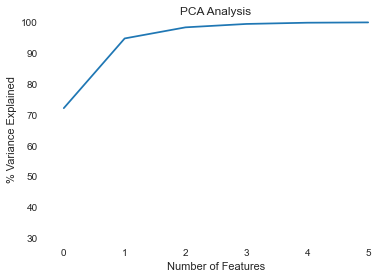

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

#### Observation - out of the available 52 featurs, just 5 features extracted from PCA are explaining 99.9% of the model. So, let's just retain these 5 extracted features rather than all 52

In [180]:
pca = PCA(n_components=5, random_state = 0)
pca.fit(X)
X_pca = pca.transform(X)
print(X.shape)

(15120, 52)


In [181]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4
0,1645.577232,4624.322593,-337.132612,94.129492,-35.684585
1,1515.626132,4647.197867,-334.223884,49.276872,-26.064321
2,3762.972005,2989.225209,-544.331078,114.479093,5.005117
3,3735.714904,3114.406093,-561.020519,107.547793,18.533879
4,1485.946176,4603.048324,-343.532710,-6.942680,-33.870539


In [182]:
y.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [183]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, random_state = 1, train_size = 0.75, stratify = y)
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train_pca.shape)
print(y_test_pca.shape)

(11340, 5)
(3780, 5)
(11340,)
(3780,)


#### Lets perform scaling on the dataset

In [184]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train_pca)
X_train_pca_scaled = ss.transform(X_train_pca)
X_test_pca_scaled = ss.transform(X_test_pca)

In [185]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train_pca_scaled, y_train_pca)
y_pred_rfc = rfc.predict(X_test_pca_scaled)
y_train_pred_rfc = rfc.predict(X_train_pca_scaled)
print(accuracy_score(y_train, y_train_pred_rfc))
print(accuracy_score(y_test, y_pred_rfc))

1.0
0.8449735449735449


#### Let us try NB, SVM and KNN classifiers

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca_scaled, y_train_pca)
y_pred_knn = knn_model.predict(X_test_pca_scaled)
y_train_pred_knn = knn_model.predict(X_train_pca_scaled)
print(accuracy_score(y_train, y_train_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

0.863668430335097
0.8042328042328042


#### Let's try hyperparameter tuning on this

In [187]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np
def generate():
    param_dist = {"n_neighbors": range(1,30),                             #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean","manhattan","minkowski","chebyshev"]
                 }
    

    n_iter_search = 25
    knn_model = KNeighborsClassifier()
    
    return RandomizedSearchCV(knn_model,random_state = 0, param_distributions = param_dist,     
                                    n_iter = n_iter_search,
                                    n_jobs = -1)
knn_model2 = generate()
knn_model2.fit(X_train_pca_scaled, y_train_pca)                                         # fitting the model

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=25, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree'],
                                        'leaf_size': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32),
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'chebyshev'],
                                        'n_neighbors': range(1, 30)},
                   random_state=0)

In [188]:
print(knn_model2.best_params_)

{'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 512, 'algorithm': 'ball_tree'}


In [189]:
y_pred_knn = knn_model2.predict(X_test_pca_scaled)
y_train_pred_knn = knn_model2.predict(X_train_pca_scaled)
print(accuracy_score(y_train, y_train_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

0.9097001763668431
0.8134920634920635


#### Given the kind of data we have, the features cannot be independent of each other. Even though this is one of the assumptionso f Naive Bayes, Let's try Naive bayes on this.

In [190]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca_scaled, y_train_pca)
y_pred_gnb = gnb.predict(X_test_pca_scaled)
y_train_pred_gnb = gnb.predict(X_train_pca_scaled)
print(accuracy_score(y_train, y_train_pred_gnb))
print(accuracy_score(y_test, y_pred_gnb))

0.5139329805996473
0.5251322751322751


As expected, the performance is pathetic. No point wasting time in HP tuning when KNN score is high

#### Let's try SVM, default kernel, i.e. RBF

In [191]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(random_state = 0, kernel='rbf')
svc.fit(X_train_pca_scaled, y_train_pca)
y_pred_svc = svc.predict(X_test_pca_scaled)
y_train_pred_svc = svc.predict(X_train_pca_scaled)
print(accuracy_score(y_train, y_train_pred_svc))
print(accuracy_score(y_test, y_pred_svc))

0.7457671957671957
0.7425925925925926


#### Let's try SVM, linear kernel

In [192]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svcl = SVC(random_state = 0, kernel='linear')
svcl.fit(X_train_pca_scaled, y_train_pca)
y_pred_svcl = svcl.predict(X_test_pca_scaled)
y_train_pred_svcl = svcl.predict(X_train_pca_scaled)
print(accuracy_score(y_train, y_train_pred_svcl))
print(accuracy_score(y_test, y_pred_svcl))

0.6163139329805997
0.6248677248677249


#### Let's try SVM, polynomial kernel

In [193]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svcp = SVC(random_state = 0, kernel='poly')
svcp.fit(X_train_pca_scaled, y_train_pca)
y_pred_svcp = svcp.predict(X_test_pca_scaled)
y_train_pred_svcp = svcp.predict(X_train_pca_scaled)
print(accuracy_score(y_train, y_train_pred_svcp))
print(accuracy_score(y_test, y_pred_svcp))

0.6781305114638448
0.6764550264550264


#### Among the three, RBF kernel is promising. Its results are also indicate that there is no over-fitting. Lets try HP tuning on it

In [194]:
from sklearn.model_selection import cross_val_score
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score_train=[]
acc_score_test=[]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def generate():
    for gamma in gamma_range:
        svc = SVC(kernel='rbf',random_state = 0, gamma=gamma)
        svc.fit(X_train_pca_scaled, y_train_pca)
        y_pred_svc = svc.predict(X_test_pca_scaled)
        y_train_pred_svc = svc.predict(X_train_pca_scaled)
        acc_score_train.append(accuracy_score(y_train, y_train_pred_svc))
        acc_score_test.append(accuracy_score(y_test, y_pred_svc))
    
    print(acc_score_train)
    print(acc_score_test)
    return
generate()

[0.4757495590828924, 0.5588183421516755, 0.6353615520282186, 0.716931216931217, 0.8331569664902998, 0.9674603174603175, 0.9998236331569665]
[0.4828042328042328, 0.5597883597883598, 0.6388888888888888, 0.7161375661375662, 0.8082010582010583, 0.832010582010582, 0.5351851851851852]


Even though we get very high values of accuracy for gamma=10 and gamma=100, there seems to be huge overfitting. However near values of gamma =0.1 and gamma=1, we get good scores on both train and test. Lets explore this more

In [195]:
from sklearn.model_selection import cross_val_score
gamma_range=[0.1,0.5, 1,2,3,4,5]
acc_score_train=[]
acc_score_test=[]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def generate():
    for gamma in gamma_range:
        svc = SVC(kernel='rbf',random_state = 0, gamma=gamma)
        svc.fit(X_train_pca_scaled, y_train_pca)
        y_pred_svc = svc.predict(X_test_pca_scaled)
        y_train_pred_svc = svc.predict(X_train_pca_scaled)
        acc_score_train.append(accuracy_score(y_train, y_train_pred_svc))
        acc_score_test.append(accuracy_score(y_test, y_pred_svc))
    
    print(acc_score_train)
    print(acc_score_test)
    return
generate()

[0.716931216931217, 0.7907407407407407, 0.8331569664902998, 0.8743386243386243, 0.9010582010582011, 0.9202821869488537, 0.9343033509700176]
[0.7161375661375662, 0.7833333333333333, 0.8082010582010583, 0.8224867724867725, 0.8312169312169312, 0.8375661375661375, 0.841005291005291]


let us use the value of gamma as 2 as it has decent accuracy score. 0.87 on training data and 0.82 on test data. The performance on test data is better than knn results

Since the problem statement is regarding the correct classification of forest cover type, we can use accuracy as the major metrics rather than recall or precision as we dont know the cost of misclassification of particular class.

Comparing the three front runner models<br>
RandomForest -> accuracy on train = 1 ,   accuracy on test = 0.84<br>
KNN -> acc on train = 0.91, acc on test = 0.81 HP - {'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 512, 'algorithm': 'ball_tree'}<br>
SVM -> acc on train = 0.87, acc on test = 0.82 HP - ('kernel':'rbf', 'gamma':2)

#### Let us finalize SVM model as it is not overfitting and is giving good accuracy score on both train and test